<h1 style="text-align: center;">Quantum-Platform-Compare: Implementation of Shor's Algorithm</h1>
<br>
<!--<p style="text-align: center;"><strong>Prepared for:</strong> Dr. Sultan Almuhammadi</p>-->
<p style="text-align: center;"><strong>Prepared by:</strong> Ahmed Almalki</p>
<hr>

## Overview
<table align="left">
  <thead>
    <tr>
      <th></th>
      <th><strong>qiskit</strong></th>
      <th><strong>Cirq</strong></th>
      <th><strong>pyQuil</strong></th>
      <th><strong>pytket</strong></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><strong>First Release Date</strong></td>
      <td>10-Nov-17</td>
      <td>17-Apr-18</td>
      <td>16-Jan-17</td>
      <td>21-Sep-21</td>
    </tr>
    <tr>
      <td><strong>Number of Releases</strong></td>
      <td>116</td>
      <td>25</td>
      <td>237</td>
      <td>142</td>
    </tr>
    <tr>
      <td><strong>Latest Release</strong></td>
      <td>1.0.2 (Mar 8, 2024)</td>
      <td>1.3.0 (Dec 2, 2023)</td>
      <td>4.10.0 (Apr 29, 2024)</td>
      <td>1.27.0 (Apr 19, 2024)</td>
    </tr>
    <tr>
      <td><strong>GitHub Stars</strong></td>
      <td>4.6k</td>
      <td>4.1k</td>
      <td>1.4k</td>
      <td>232</td>
    </tr>
    <tr>
      <td><strong>GitHub Contributors</strong></td>
      <td>556</td>
      <td>212</td>
      <td>97</td>
      <td>40</td>
    </tr>
    <tr>
      <td><strong>StackExchange Questions</strong></td>
      <td>2327</td>
      <td>181</td>
      <td>15</td>
      <td>9</td>
    </tr>
    <tr>
      <td><strong>Number of Downloads</strong></td>
      <td>5M</td>
      <td>3M</td>
      <td>3M</td>
      <td>2M</td>
    </tr>
    <tr>
      <td><strong>Support Provider</strong></td>
      <td>IBM</td>
      <td>Google</td>
      <td>Rigetti</td>
      <td>Quantinuum</td>
    </tr>
  </tbody>
</table>


## Version Information

<table align="left">
  <thead>
    <tr>
      <th>Component</th>
      <th>Version</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>python</td>
      <td>3.11.5</td>
    </tr>
    <tr>
      <td>qiskit</td>
      <td>0.45.3</td>
    </tr>
    <tr>
      <td>qiskit-ibmq-provider</td>
      <td>0.20.2</td>
    </tr>
  </tbody>
</table>

</table>


# What Shor Algorithm
- It is a `quantum algorithm` for integer factorization.
- It is Developed by Peter Shor in `1994`.
- It significantly potential impacts cryptography, `RSA`.
- It Operates in `polynomial` time, much faster than classical algorithms for the same task.
- The objective is to find the prime factors of a composite number `N`.

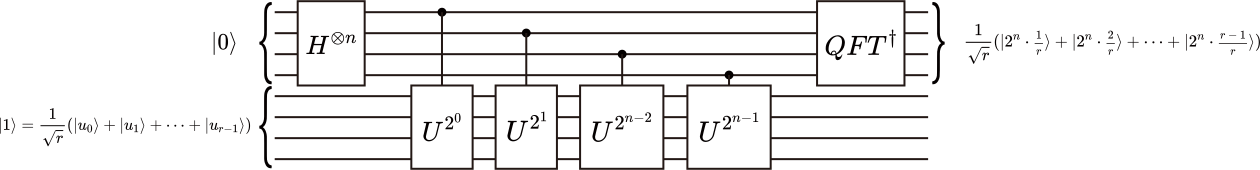

# The Potential Impacts of Shor Algorithm
- **Q-Day**: Hypothetical point in time when quantum computers become powerful enough to break much of today's encryption.
- **Cybersecurity Risks**: Breakdown of current encryption, leading to widespread data vulnerability.
- **Financial Systems Instability**: Compromise of encrypted banking and financial transactions.
- **National Security Threats**: Risk to defense communication and data systems.
- **Loss of Privacy**: Personal and sensitive information becoming easily accessible.

# Build `Controlled U Gate`
- Identify `n` and `m` qubits lengths.
- Determine if the given `a` is accepted value.
- Identify the required x gates by `a` XOR `1` 
- Build the circuit.

In [3]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
# from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
# from qiskit_aer import Aer
# from qiskit_ibmq_provider import IBMQ


from qiskit.visualization import plot_histogram, circuit_drawer, plot_state_city, plot_state_hinton

from qiskit.providers.ibmq import least_busy
from qiskit.compiler import transpile, assemble
from qiskit.tools.monitor import job_monitor

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import math
from fractions import Fraction

from sympy import isprime

In [4]:
N=2048**2
ns=[]
for n in range(2,N):
    if math.gcd(n,N)==1:
        ns.append(n)

In [5]:
len(ns)

2097151

In [6]:
def c_amodN(a, N, power, draw=False):
    
    # identify n-length and m-length
    n_len = math.ceil(math.log2(N))
    m_len = 2 * n_len
    
    # identify accepted `a` values
    # the best name is `as` insteas of `ns` but `as` is reservied
    ns=[]
    for n in range(2,N):
        if math.gcd(n,N)==1:
            ns.append(n)
    
    if(draw):
        return _c_amodN_print(a, N, ns, n_len, m_len, power)
    
    if a not in ns:
        raise ValueError(f"'a' must be {ns}")
    U = QuantumCircuit(n_len)
    
    for i, bit in enumerate(format(pow(a,power,N)^1, f'0{n_len}b')):
        if bit == '1':
            U.x(i)

    U = U.to_gate()
    U.name = f"{a}^{power} mod {N}"
    c_U = U.control()
         
    return c_U


# this function just to draw what inside controlled U gate
def _c_amodN_print(a, N, ns, n_len, m_len, power):        
    print(ns)
    
    U = QuantumCircuit(n_len)
    print(f"{format(a, f'0{n_len}b')} | a = {a}")
    print(f"{format(pow(a,power,N), f'0{n_len}b')} | {a}^{power} mod {N} = {pow(a,power,N)}")
    print(f"{format(pow(a,power,N)^1, f'0{n_len}b')} | x_gates")
    
    for i, bit in enumerate(format(pow(a,power,N), f'0{n_len}b')):
        if bit == '1':
            U.x(i)
    U.barrier()
    for i, bit in enumerate(format(pow(a,power,N)^1, f'0{n_len}b')):
        if bit == '1':
            U.x(i)
    display(U.draw('mpl'))

    return U

In [7]:
def qft_dagger(n):
    """n-qubit QFTdagger the first n qubits in circ"""
    qc = QuantumCircuit(n)
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT†"
    return qc

# Shor Algorithm Implementation
---

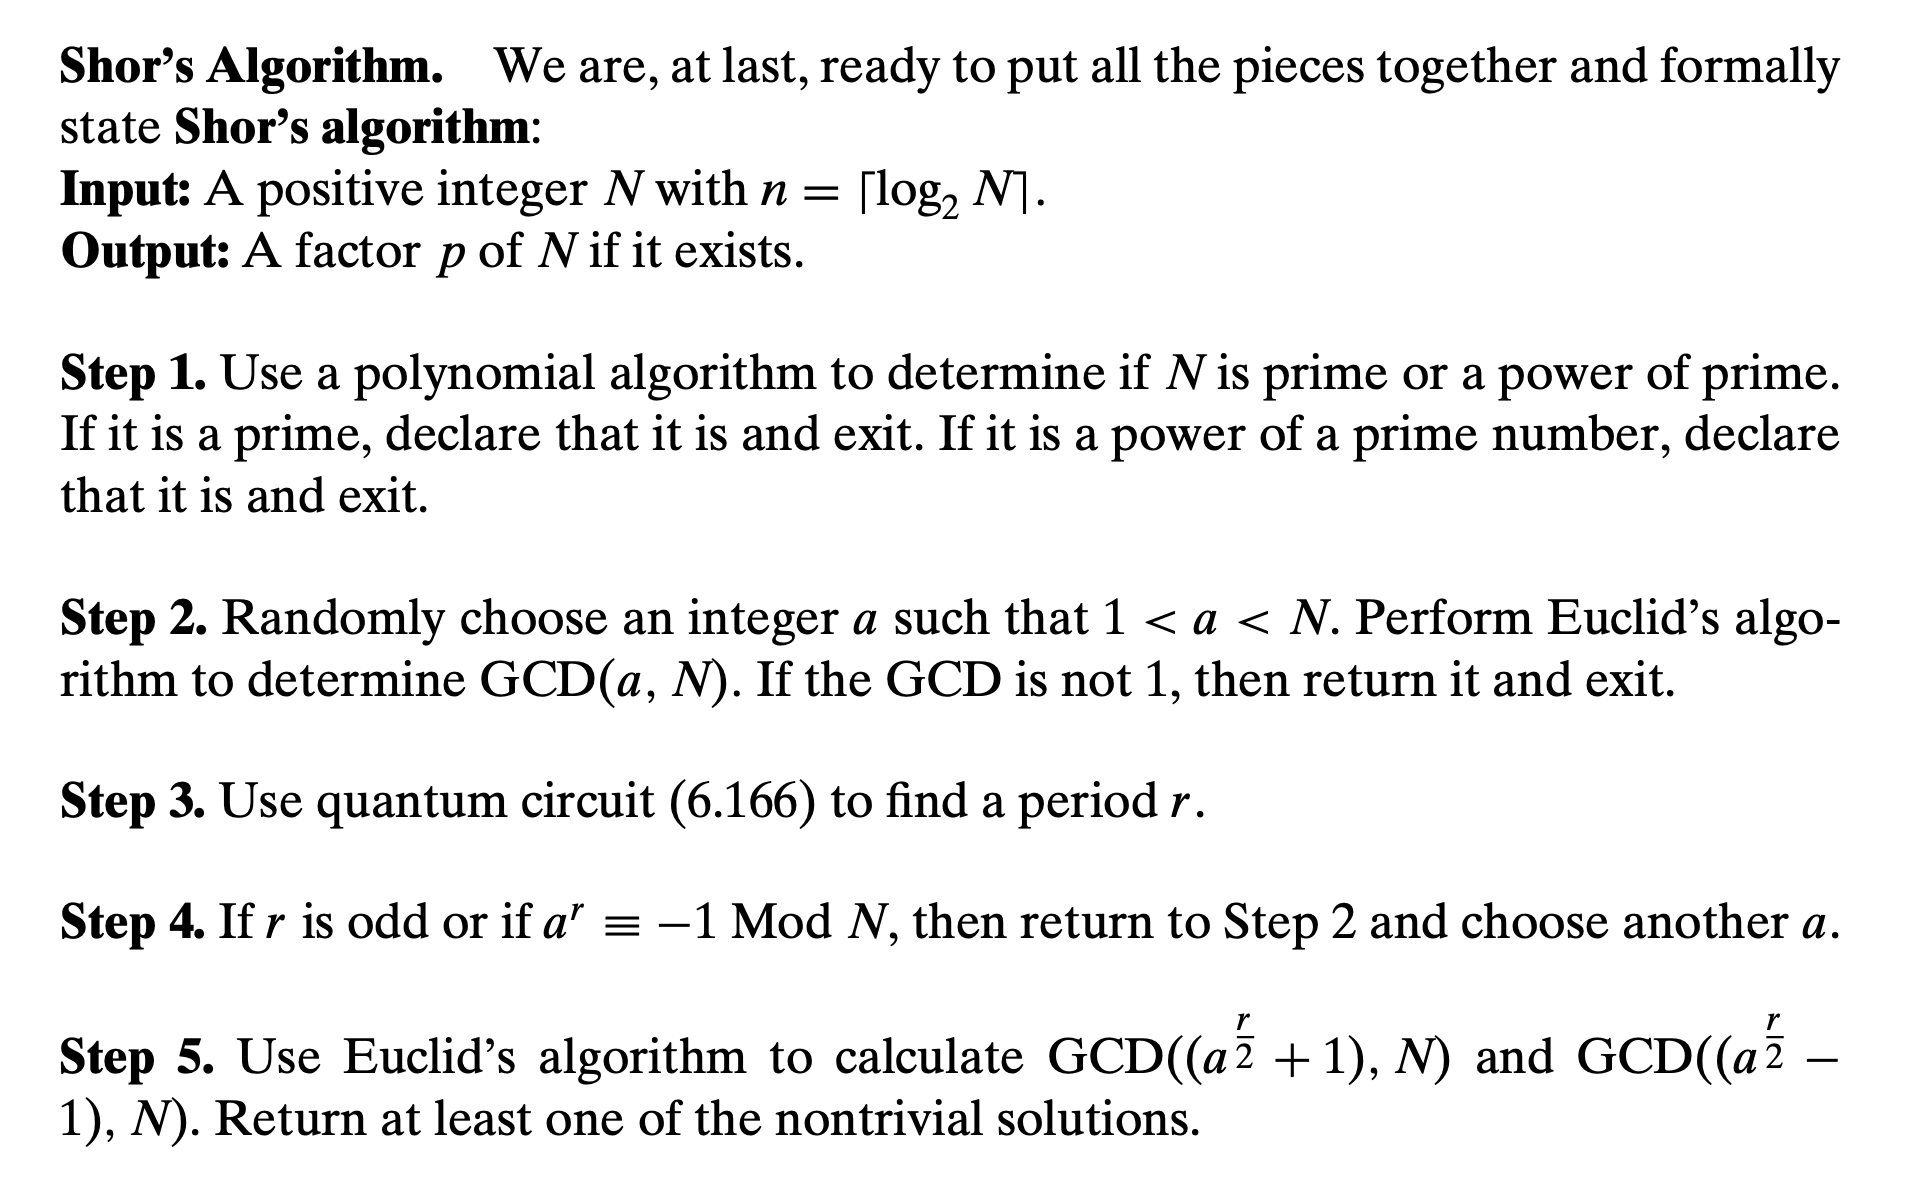

> - Yanofsky, N. S., & Mannucci, M. A. (2008). Quantum Computing for Computer Scientists. Cambridge University Press. 
---

## Step 1&2: Determining `N` & `a`
- Use a polynomial algorithm to determine if `N` is prime or a power of prime.

- $1<$ `a` $<N$.

- `n_len` $=log_2 N$.

- `m_len` $=2\times$ `n_len`.

> If the targeted N requires 1000 bits for its representation, the quantum circuit will be composed of 1000 qubits.

In [8]:
N=143
a=2
n_len = math.ceil(math.log2(N))
m_len = 2*n_len

In [9]:
if isprime(N):
    print(f"{N} is a prime number")
else:
    print(f"{N} is not a prime number")

143 is not a prime number


[2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 79, 80, 81, 82, 83, 84, 85, 86, 87, 89, 90, 92, 93, 94, 95, 96, 97, 98, 100, 101, 102, 103, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 131, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142]
00000010 | a = 2
00000010 | 2^1 mod 143 = 2
00000011 | x_gates


C:\Users\ahmed\anaconda3\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


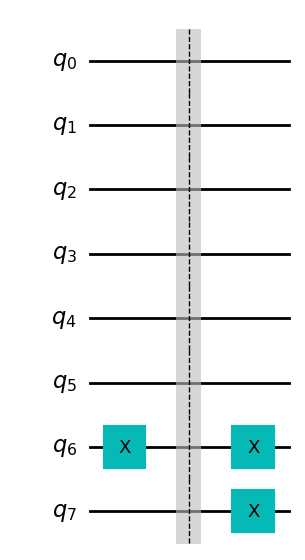

[2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 79, 80, 81, 82, 83, 84, 85, 86, 87, 89, 90, 92, 93, 94, 95, 96, 97, 98, 100, 101, 102, 103, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 131, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142]
00000010 | a = 2
00000100 | 2^2 mod 143 = 4
00000101 | x_gates


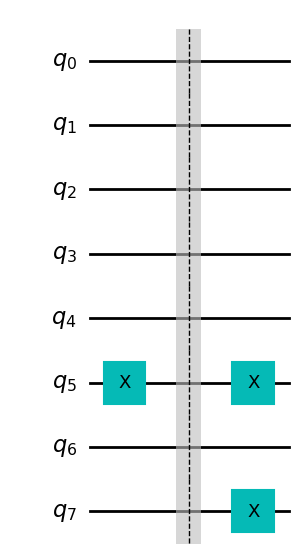

[2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 79, 80, 81, 82, 83, 84, 85, 86, 87, 89, 90, 92, 93, 94, 95, 96, 97, 98, 100, 101, 102, 103, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 131, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142]
00000010 | a = 2
00010000 | 2^4 mod 143 = 16
00010001 | x_gates


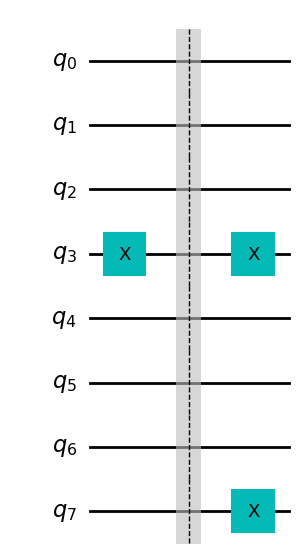

[2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 79, 80, 81, 82, 83, 84, 85, 86, 87, 89, 90, 92, 93, 94, 95, 96, 97, 98, 100, 101, 102, 103, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 131, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142]
00000010 | a = 2
01110001 | 2^8 mod 143 = 113
01110000 | x_gates


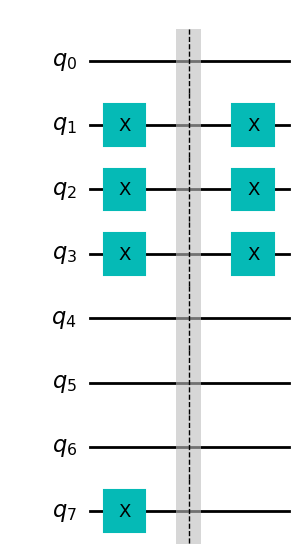

[2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 79, 80, 81, 82, 83, 84, 85, 86, 87, 89, 90, 92, 93, 94, 95, 96, 97, 98, 100, 101, 102, 103, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 131, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142]
00000010 | a = 2
00101010 | 2^16 mod 143 = 42
00101011 | x_gates


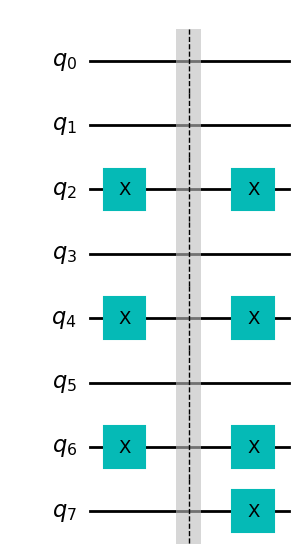

[2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 79, 80, 81, 82, 83, 84, 85, 86, 87, 89, 90, 92, 93, 94, 95, 96, 97, 98, 100, 101, 102, 103, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 131, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142]
00000010 | a = 2
00110000 | 2^32 mod 143 = 48
00110001 | x_gates


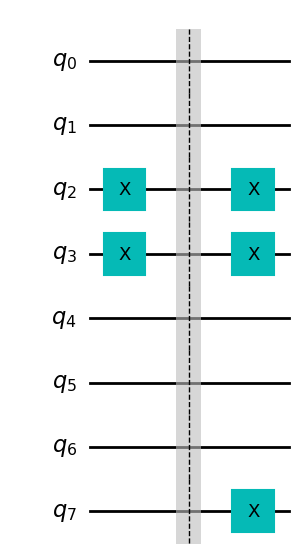

[2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 79, 80, 81, 82, 83, 84, 85, 86, 87, 89, 90, 92, 93, 94, 95, 96, 97, 98, 100, 101, 102, 103, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 131, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142]
00000010 | a = 2
00010000 | 2^64 mod 143 = 16
00010001 | x_gates


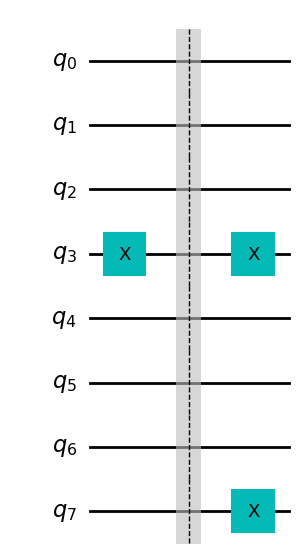

[2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 79, 80, 81, 82, 83, 84, 85, 86, 87, 89, 90, 92, 93, 94, 95, 96, 97, 98, 100, 101, 102, 103, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 131, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142]
00000010 | a = 2
01110001 | 2^128 mod 143 = 113
01110000 | x_gates


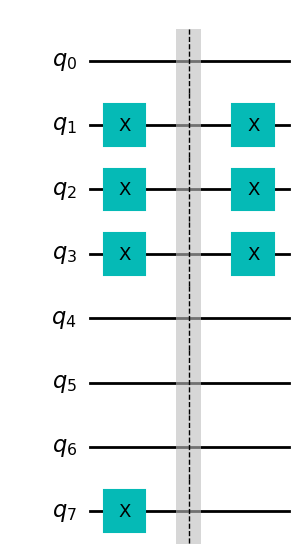

[2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 79, 80, 81, 82, 83, 84, 85, 86, 87, 89, 90, 92, 93, 94, 95, 96, 97, 98, 100, 101, 102, 103, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 131, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142]
00000010 | a = 2
00101010 | 2^256 mod 143 = 42
00101011 | x_gates


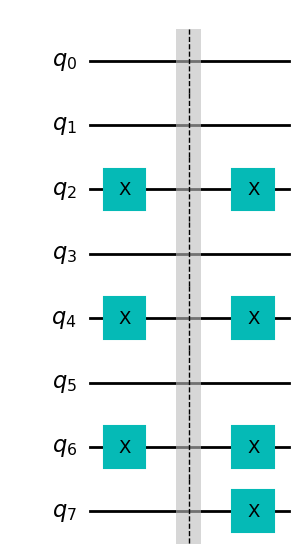

[2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 79, 80, 81, 82, 83, 84, 85, 86, 87, 89, 90, 92, 93, 94, 95, 96, 97, 98, 100, 101, 102, 103, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 131, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142]
00000010 | a = 2
00110000 | 2^512 mod 143 = 48
00110001 | x_gates


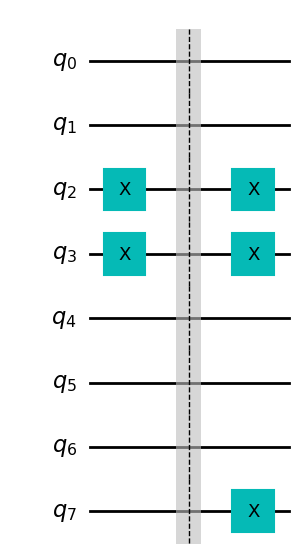

[2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 79, 80, 81, 82, 83, 84, 85, 86, 87, 89, 90, 92, 93, 94, 95, 96, 97, 98, 100, 101, 102, 103, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 131, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142]
00000010 | a = 2
00010000 | 2^1024 mod 143 = 16
00010001 | x_gates


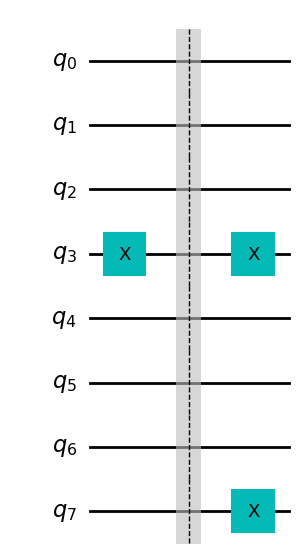

[2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 79, 80, 81, 82, 83, 84, 85, 86, 87, 89, 90, 92, 93, 94, 95, 96, 97, 98, 100, 101, 102, 103, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 131, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142]
00000010 | a = 2
01110001 | 2^2048 mod 143 = 113
01110000 | x_gates


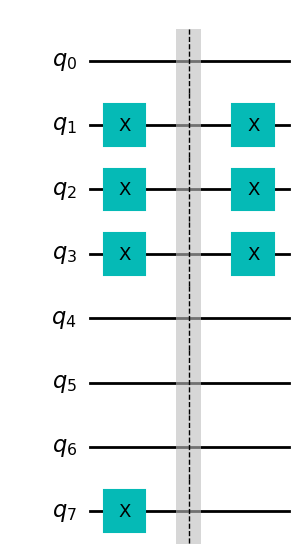

[2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 79, 80, 81, 82, 83, 84, 85, 86, 87, 89, 90, 92, 93, 94, 95, 96, 97, 98, 100, 101, 102, 103, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 131, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142]
00000010 | a = 2
00101010 | 2^4096 mod 143 = 42
00101011 | x_gates


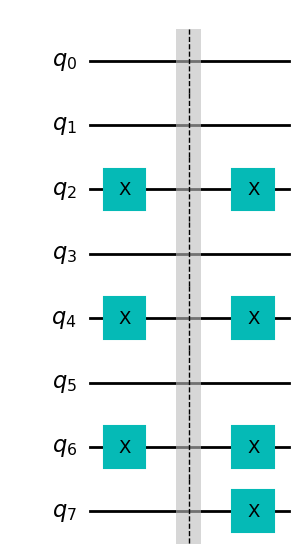

[2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 79, 80, 81, 82, 83, 84, 85, 86, 87, 89, 90, 92, 93, 94, 95, 96, 97, 98, 100, 101, 102, 103, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 131, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142]
00000010 | a = 2
00110000 | 2^8192 mod 143 = 48
00110001 | x_gates


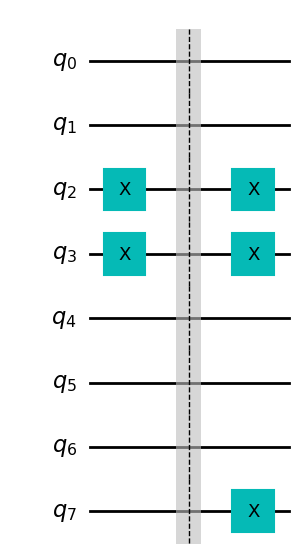

[2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 79, 80, 81, 82, 83, 84, 85, 86, 87, 89, 90, 92, 93, 94, 95, 96, 97, 98, 100, 101, 102, 103, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 131, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142]
00000010 | a = 2
00010000 | 2^16384 mod 143 = 16
00010001 | x_gates


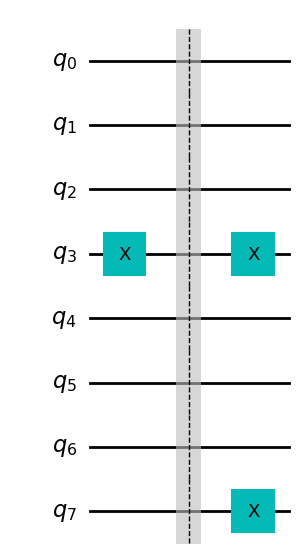

[2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 79, 80, 81, 82, 83, 84, 85, 86, 87, 89, 90, 92, 93, 94, 95, 96, 97, 98, 100, 101, 102, 103, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 131, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142]
00000010 | a = 2
01110001 | 2^32768 mod 143 = 113
01110000 | x_gates


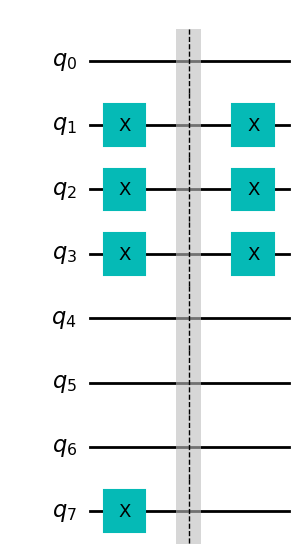

In [10]:
for p in range(m_len):
    c_amodN(2,N,2**p,draw=True)

## Step 3: Quantum Circuit to Find a Period `r`

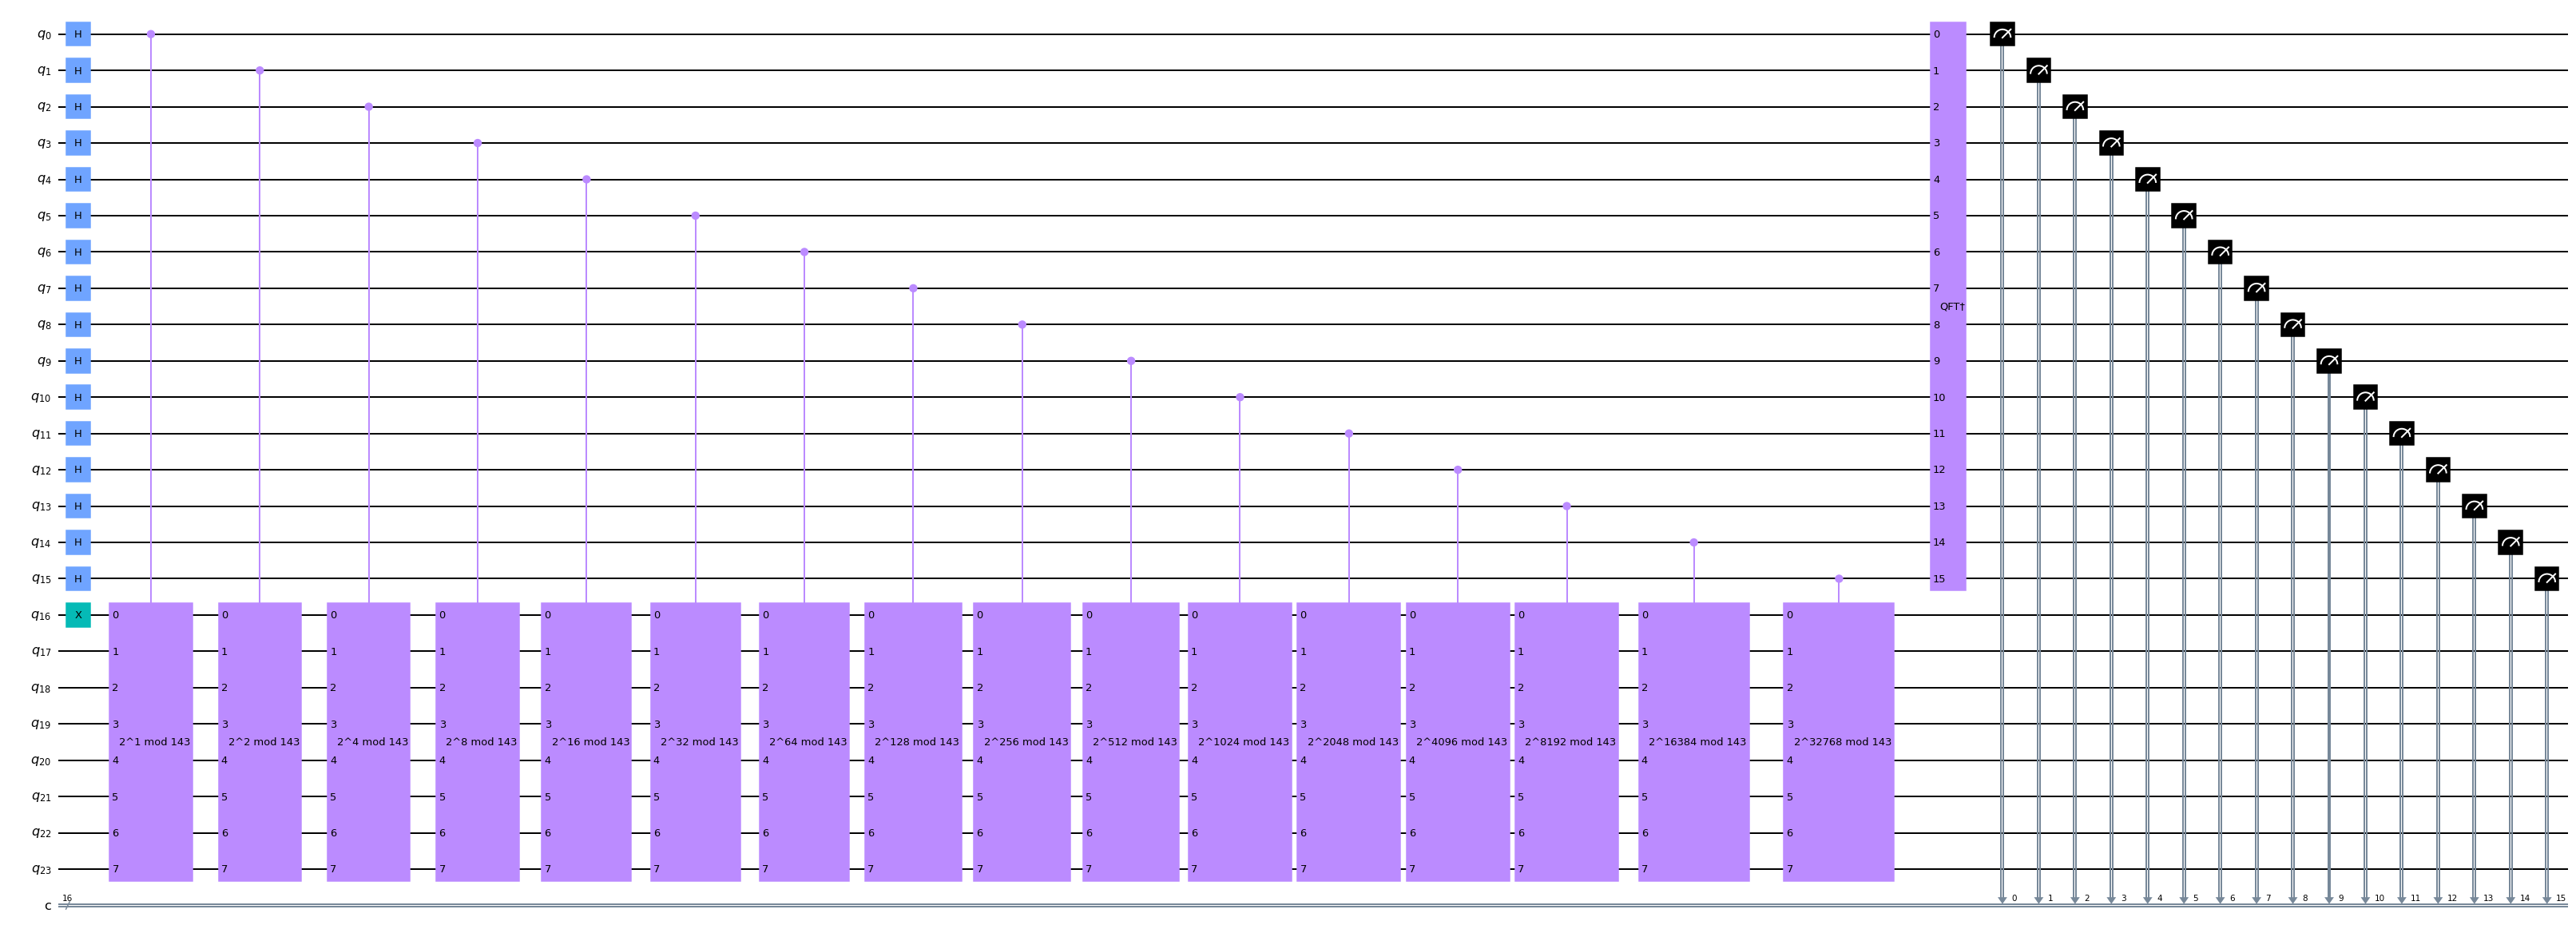

In [9]:
qc = QuantumCircuit(m_len + n_len, m_len)

# Initialize counting qubits
# in state |+>
for q in range(m_len):
    qc.h(q)

# And auxiliary register in state |1>
qc.x(m_len)

# Do controlled-U operations
for q in range(m_len):
    qc.append(c_amodN(a, N, 2**q),
             [q] + [i+m_len for i in range(n_len)])

# Do inverse-QFT
qc.append(qft_dagger(m_len), range(m_len))
# qc.append(QFT(m_len, inverse=True), range(m_len))
# qc.append(QFT(m_len).inverse(), range(m_len))


# Measure circuit
qc.measure(range(m_len), range(m_len))
# qc.draw(fold=-1)
qc.draw(fold=-1, output='mpl', style='clifford')

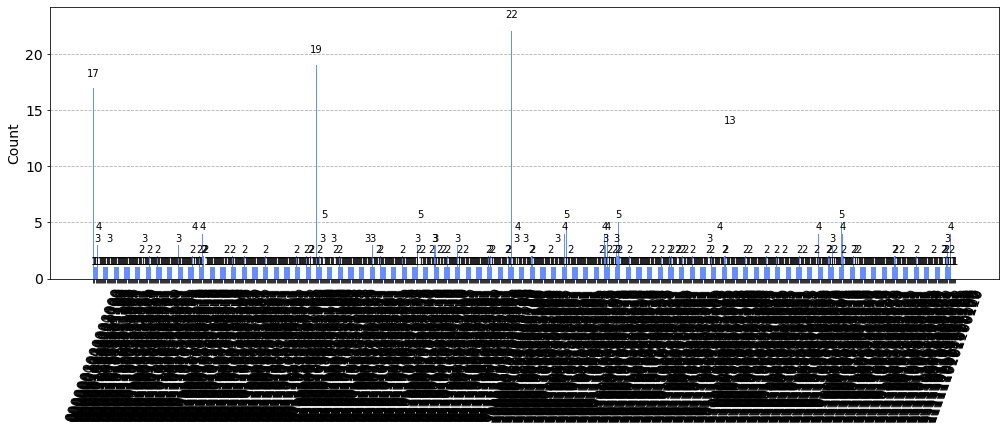

Outliers: {'0100000000000000': 19, '1000000000000000': 22, '0000000000000000': 17, '1100000000000000': 13}


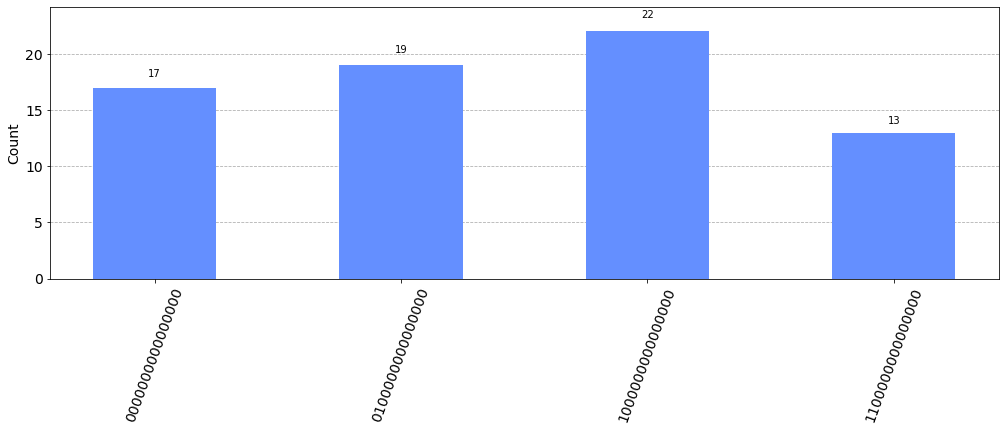

In [10]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, aer_sim)
counts = aer_sim.run(t_qc).result().get_counts()
display(plot_histogram(counts, figsize=(17, 5)))


values = list(counts.values())
mean = np.mean(values)
std_dev = np.std(values)

# Define a threshold for outliers
threshold = 3 * std_dev

# Identify outliers
outliers = {key: val for key, val in counts.items() if abs(val - mean) > threshold}

if outliers:
    counts = outliers
    
# Print outliers
print("Outliers:", counts)

# Plot histogram
plot_histogram(counts, figsize=(17, 5))


In [106]:
def qpe_amodN(a, N):
    qc = QuantumCircuit(n_len+m_len, m_len)
    for q in range(m_len):
        qc.h(q)     # Initialize counting qubits in state |+>
    qc.x(m_len) # And auxiliary register in state |1>
    for q in range(m_len): # Do controlled-U operations
        qc.append(c_amodN(a, N, 2**q),
                 [q] + [i+m_len for i in range(n_len)])
    qc.append(qft_dagger(m_len), range(m_len)) # Do inverse-QFT
    qc.measure(range(m_len), range(m_len))
    # Simulate Results
    
#     return run_and_outliers(qc)
    aer_sim = Aer.get_backend('aer_simulator')
    # `memory=True` tells the backend to save each measurement in a list
    job = aer_sim.run(transpile(qc, aer_sim), shots=1, memory=True)
    readings = job.result().get_memory()
    print("Register Reading: " + readings[0])
    phase = int(readings[0],2)/(2**m_len)
    print(f"Corresponding Phase: {phase}")
    return phase

## Step 4: if $[r = Even]$ AND $[a^r \not≡ −1 Mod N]$

In [109]:
def check_r_condition(a, r, N):
    if r % 2 == 0 and pow(a, r // 2, N) != N - 1:
        return True
    else:
        return False

> The function is to check if $[r = Even]$ AND $[a^r \not≡ −1 Mod N]$

## Step 5: Return the Nontrivial Solutions

Use Euclid’s algorithm to calculate $ GCD((a^{r/2} + 1), N)$ and $GCD((a^{r/2}−1),N) $ . 
Return at least one of the nontrivial solutions.

In [110]:
# N=143
# a=2
# n_len = math.ceil(math.log2(N))
# m_len = 2*n_len

In [119]:
FACTOR_FOUND = False
ATTEMPT = 0

N=143
n_len = math.ceil(math.log2(N))
m_len = 2*n_len

while not FACTOR_FOUND:
    ATTEMPT = 0
    for a in range(2,N):
        if math.gcd(a,N)==1:
            ATTEMPT += 1
            _txt = f'\n[a = {a}]'
            print(f"{_txt}\n{'-'*len(_txt)}")
            print(f"ATTEMPT {ATTEMPT}:")
            
            phase = qpe_amodN(a, N)

            frac = Fraction(phase).limit_denominator(N)
            r = frac.denominator
            print(f"Result: r = {r}")

            if not check_r_condition(a, r, N):
                continue

            if phase != 0:
                # Guesses for factors are gcd(x^{r/2} ±1 , 15)
                guesses = [math.gcd(a**(r//2)-1, N), math.gcd(a**(r//2)+1, N)]
                print(f"Guessed Factors: {guesses[0]} and {guesses[1]}")
                for guess in guesses:
                    if guess not in [1,N] and (N % guess) == 0:
                        # Guess is a factor!
                        print(f"*** Non-trivial factor found: {guess} ***")
                        FACTOR_FOUND = True
                        
        else:
            print(f'\n# [{a}] is not an accepted value! #')
            
        if FACTOR_FOUND:
            break


[a = 2]
--------
ATTEMPT 1:
Register Reading: 0010111100101101
Corresponding Phase: 0.1842803955078125
Result: r = 38
Guessed Factors: 1 and 1

[a = 3]
--------
ATTEMPT 2:
Register Reading: 1110010111011010
Corresponding Phase: 0.897857666015625
Result: r = 137

[a = 4]
--------
ATTEMPT 3:
Register Reading: 0100001110110101
Corresponding Phase: 0.2644805908203125
Result: r = 121

[a = 5]
--------
ATTEMPT 4:
Register Reading: 0001100101011010
Corresponding Phase: 0.099029541015625
Result: r = 101

[a = 6]
--------
ATTEMPT 5:
Register Reading: 0111101111000100
Corresponding Phase: 0.48345947265625
Result: r = 91

[a = 7]
--------
ATTEMPT 6:
Register Reading: 1010100101001101
Corresponding Phase: 0.6613311767578125
Result: r = 62
Guessed Factors: 1 and 1

[a = 8]
--------
ATTEMPT 7:
Register Reading: 1110110101001101
Corresponding Phase: 0.9269561767578125
Result: r = 137

[a = 9]
--------
ATTEMPT 8:
Register Reading: 1100001000111100
Corresponding Phase: 0.75872802734375
Result: r = 29


# Shor's algorithm breaking RSA


## Step 1: Key Generation (Alice)

1. **Choosing Primes and Generating Keys:**
   - Alice selects two large prime numbers, denoted as `p` and `q`.
   - She then calculates their product `N = p * q`. This number, `N`, is part of her public key.
   - The public key also includes a number `e`, which is chosen such that it is coprime with `(p-1)*(q-1)`.
   - Alice then computes a number `d` satisfying `d ≡ e^-1 (mod (p-1)*(q-1))`. The number `d` is her private key.
   - The public key is the pair `(N, e)`, and the private key is `d`.



## Step 2: Encryption (Bob)

1. **Encrypting the Message:**
   - Bob wants to send a message `M` securely to Alice.
   - He uses Alice's public key `(N, e)` to encrypt his message.
   - The encrypted message, or ciphertext, `C`, is computed as `C ≡ M^e (mod N)`.



## Step 3: Decryption (Alice)

1. **Decrypting the Message:**
   - Alice receives the encrypted message `C` from Bob.
   - She uses her private key `d` to decrypt the message.
   - The original message `M` is recovered by computing `M ≡ C^d (mod N)`.


## Step 4: Breaking RSA with Shor's Algorithm (Eve)

1. **Using Shor's Algorithm:**
   - Eve, an eavesdropper, intercepts the encrypted message `C` and wants to decrypt it.
   - She uses `Shor's algorithm` on a quantum computer to efficiently factor `N` into `p` and `q`.
   - With `p` and `q`, Eve can compute `(p-1)*(q-1)` and then find `d` (since `e` is public).
   - Knowing `d`, Eve can decrypt `C` and read Bob's original message `M`.



## Breaking RSA with Shor's Algorithm
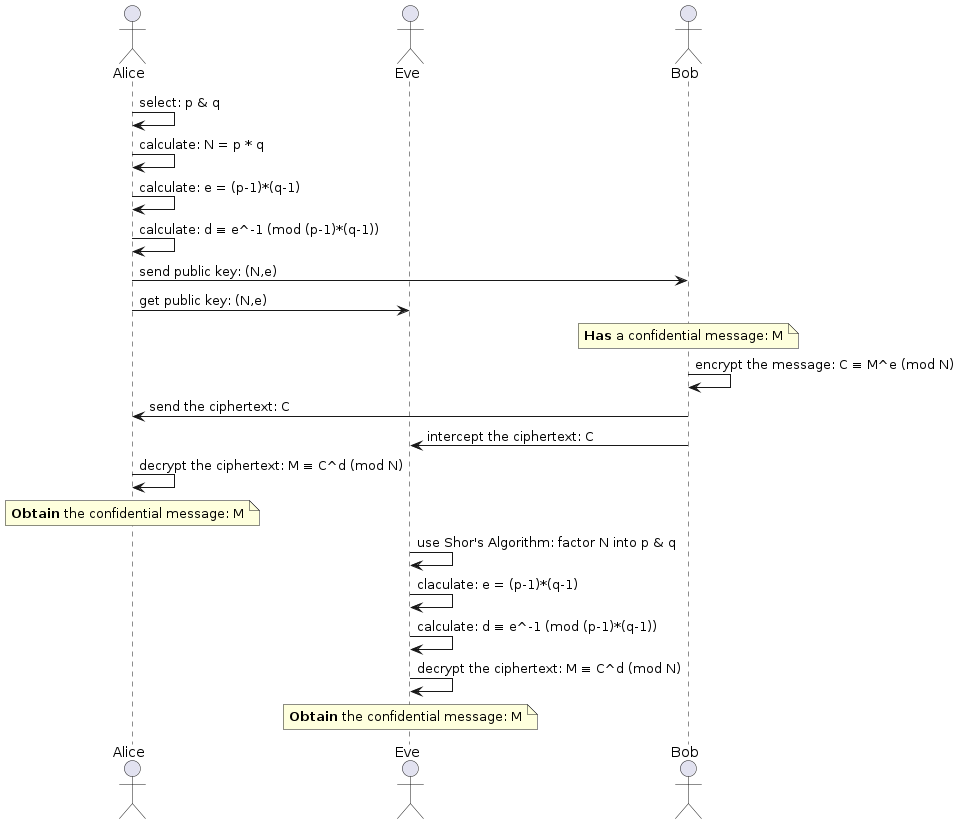

In [33]:
import iplantuml

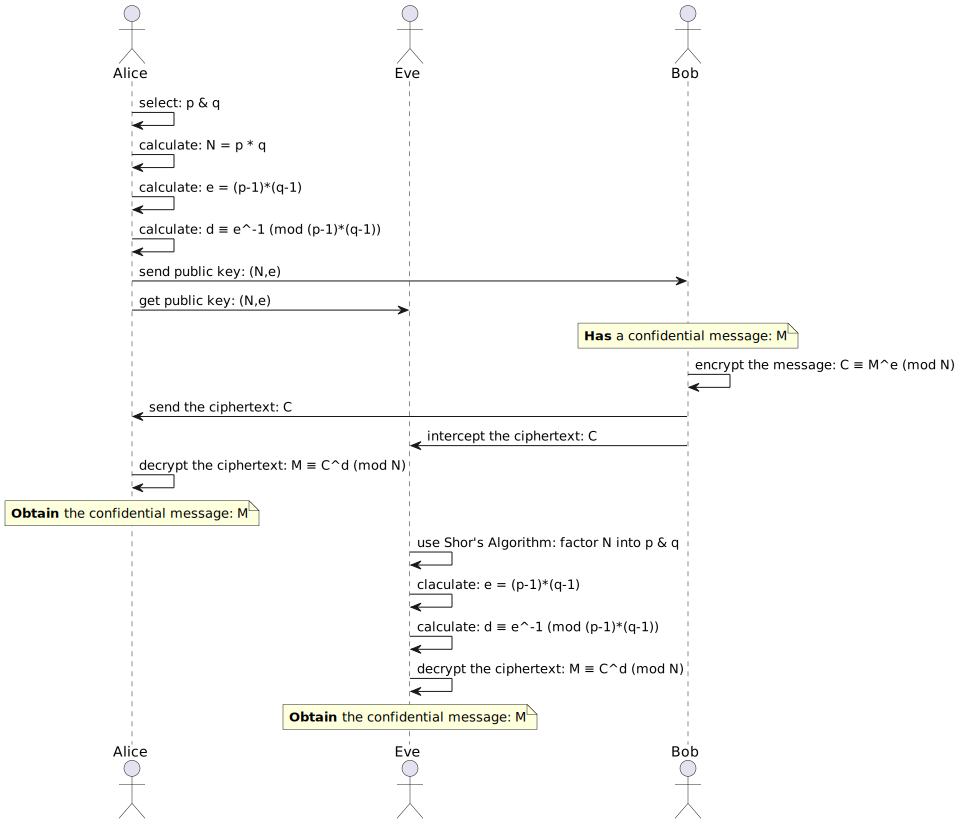

In [135]:
%%plantuml

@startuml
actor Alice as a
actor Eve as e
actor Bob as b

a -> a : select: p & q
a -> a : calculate: N = p * q
a -> a : calculate: e = (p-1)*(q-1)
a -> a : calculate: d ≡ e^-1 (mod (p-1)*(q-1))
a -> b : send public key: (N,e)
a -> e : get public key: (N,e)
note over of b : **Has** a confidential message: M
b -> b : encrypt the message: C ≡ M^e (mod N)
b -> a : send the ciphertext: C
b -> e : intercept the ciphertext: C
a -> a : decrypt the ciphertext: M ≡ C^d (mod N)
note over of a : **Obtain** the confidential message: M
e -> e : use Shor's Algorithm: factor N into p & q
e -> e : claculate: e = (p-1)*(q-1)
e -> e : calculate: d ≡ e^-1 (mod (p-1)*(q-1))
e -> e : decrypt the ciphertext: M ≡ C^d (mod N)
note over of e: **Obtain** the confidential message: M

@enduml


## UML to Image

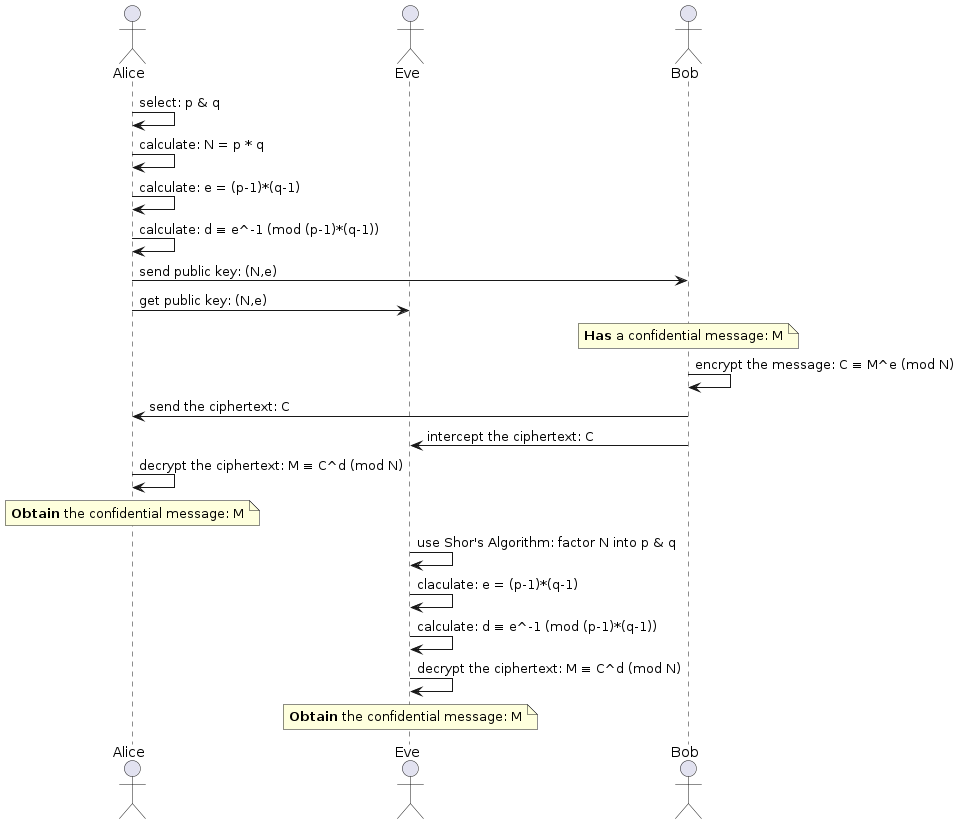

In [138]:
from plantuml import PlantUML
from IPython.display import Image, display

# Server URL (you can use the default public PlantUML server or set up your own)
server_url = 'https://www.plantuml.com/plantuml/png/'

plantuml_service = PlantUML(url=server_url)

def render_plantuml_diagram(uml_code):
    """
    Renders a UML diagram from PlantUML code using the specified PlantUML server.
    """
    diagram = plantuml_service.processes(uml_code)
    display(Image(diagram))
    

    
plantuml_code = """
@startuml
actor Alice as a
actor Eve as e
actor Bob as b

a -> a : select: p & q
a -> a : calculate: N = p * q
a -> a : calculate: e = (p-1)*(q-1)
a -> a : calculate: d ≡ e^-1 (mod (p-1)*(q-1))
a -> b : send public key: (N,e)
a -> e : get public key: (N,e)
note over of b : **Has** a confidential message: M
b -> b : encrypt the message: C ≡ M^e (mod N)
b -> a : send the ciphertext: C
b -> e : intercept the ciphertext: C
a -> a : decrypt the ciphertext: M ≡ C^d (mod N)
note over of a : **Obtain** the confidential message: M
e -> e : use Shor's Algorithm: factor N into p & q
e -> e : claculate: e = (p-1)*(q-1)
e -> e : calculate: d ≡ e^-1 (mod (p-1)*(q-1))
e -> e : decrypt the ciphertext: M ≡ C^d (mod N)
note over of e: **Obtain** the confidential message: M

@enduml
"""

render_plantuml_diagram(plantuml_code)
